In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Project\\Indian-Resturants.csv")

In [3]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


# Data Overview

In [4]:
df.shape

(211944, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2)

res_id                   0.00
name                     0.00
establishment            0.00
url                      0.00
address                  0.06
city                     0.00
city_id                  0.00
locality                 0.00
latitude                 0.00
longitude                0.00
zipcode                 77.00
country_id               0.00
locality_verbose         0.00
cuisines                 0.66
timings                  1.83
average_cost_for_two     0.00
price_range              0.00
currency                 0.00
highlights               0.00
aggregate_rating         0.00
rating_text              0.00
votes                    0.00
photo_count              0.00
opentable_support        0.02
delivery                 0.00
takeaway                 0.00
dtype: float64

In [8]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [9]:
df.nunique()

res_id                  55568
name                    41100
establishment              27
url                     55568
address                 50657
city                       99
city_id                    83
locality                 3731
latitude                53362
longitude               53326
zipcode                  1311
country_id                  1
locality_verbose         3910
cuisines                 9382
timings                  7740
average_cost_for_two      145
price_range                 4
currency                    1
highlights              31455
aggregate_rating           33
rating_text                39
votes                    2644
photo_count              2514
opentable_support           1
delivery                    3
takeaway                    1
dtype: int64

## Initial Findings:


#### Missing Values:

1. zipcode has a significant number of missing values (163,187 missing).
2. cuisines, timings, address, and opentable_support have some missing values, but not critically high.
3. Number of Cities: The dataset contains restaurants from 99 different cities.

### Basic Statistics:

1. The average cost for two is ₹595, with a wide range from ₹0 to ₹30,000.
2. The price range varies from 1 to 4.
3. The average rating is 3.39, with a maximum of 4.9.
4. Some restaurants have negative votes, which seems like an error.

# Location Analysis

In [10]:
# Finding the city with the highest number of restaurants
city_counts = df["city"].value_counts()
top_city = city_counts.idxmax() # give index of max value
top_city_count = city_counts.max()

# Display top 5 cities with the most restaurants
top_cities = city_counts.head(5)

print(top_city,top_city_count,"Highest Number of Restaurant")

print("Top 5 Cities:",top_cities)


Chennai 11630 Highest Number of Restaurant
Top 5 Cities: city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Name: count, dtype: int64


### distribution of restaurant ratings

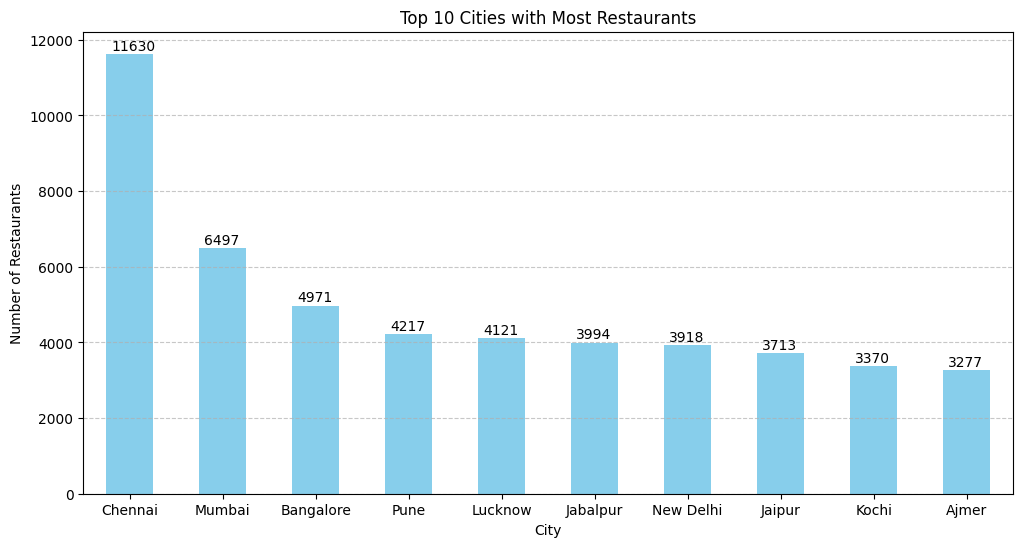

In [11]:
# Top 10 cities by restaurant count
plt.figure(figsize=(12, 6))
bars=city_counts.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 100, str(int(bar.get_height())), fontsize=10)
plt.show()



### City-Wise Restaurant Ratings

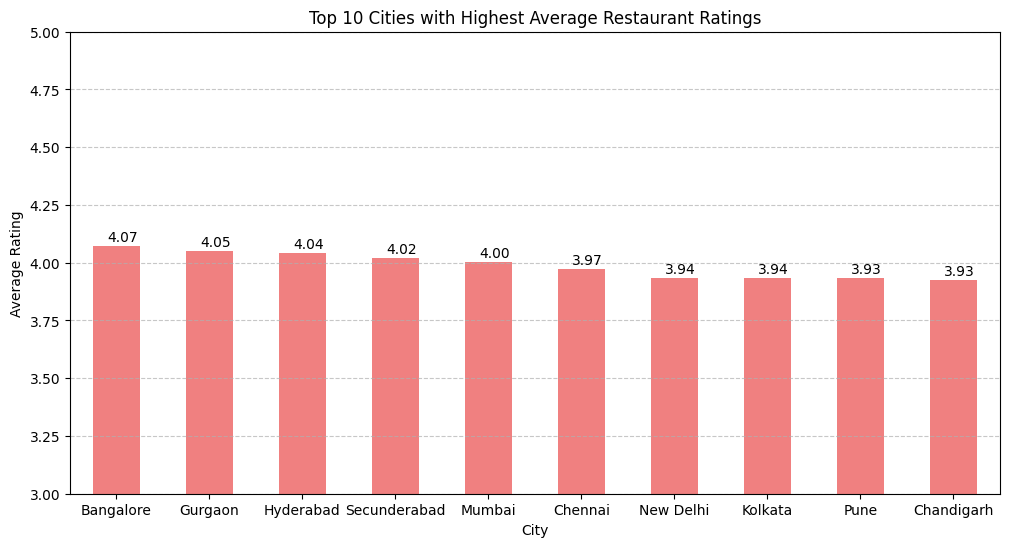

In [12]:
# Average rating per city
city_avg_rating = df.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False)

# Top 10 cities with highest restaurant ratings
plt.figure(figsize=(12, 6))
bars=city_avg_rating.head(10).plot(kind="bar", color="lightcoral")
plt.title("Top 10 Cities with Highest Average Restaurant Ratings")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.ylim(3, 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.02, f"{bar.get_height():.2f}", fontsize=10)
plt.show()


## Location Analysis Observations:
1. Chennai has the highest number of restaurants (11,630), followed by Mumbai, Bangalore, Pune, and Lucknow.
2. The number of restaurants varies significantly across cities, with metro cities having a much higher concentration.
3. This indicates that restaurant density is highest in urban areas, which aligns with higher demand.
#### City-Wise Restaurant Ratings:
1. Bangalore has the highest average restaurant rating (~4.07), followed by Gurgaon, Hyderabad, and Secunderabad.
2. Ratings are generally higher in metro cities, likely due to increased competition and higher customer expectations.

#  Cuisine Analysis

In [13]:
#Handling missing values and splitting cuisines
df["cuisines"] = df["cuisines"].astype(str).fillna("")
all_cuisines = df["cuisines"].str.split(", ").explode()
cuisine_counts = all_cuisines.value_counts()


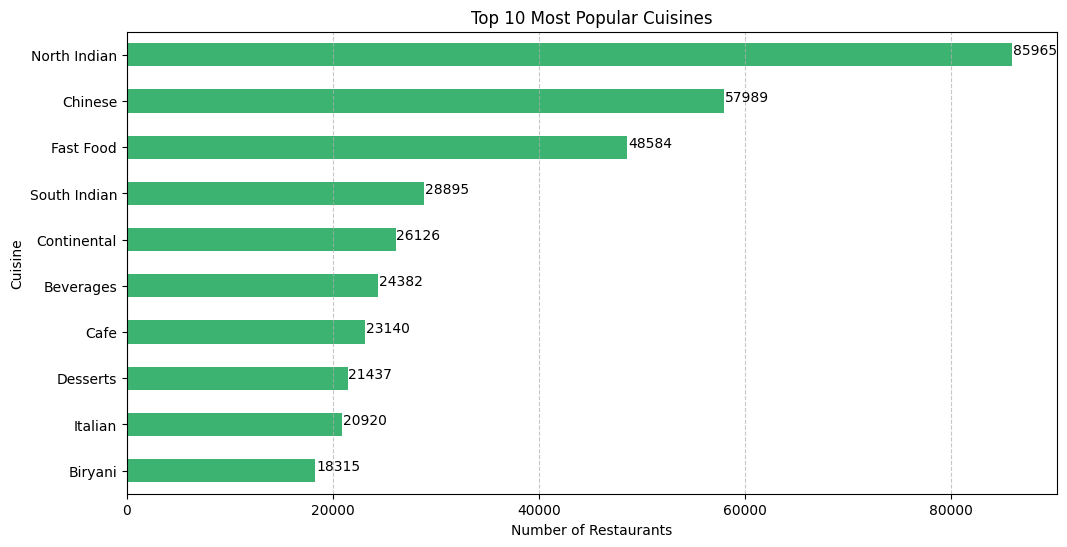

In [14]:
# Top 10 most popular cuisines
plt.figure(figsize=(12, 6))
bars = cuisine_counts.head(10).plot(kind="barh", color="mediumseagreen")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.title("Top 10 Most Popular Cuisines")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), fontsize=10)
plt.show()

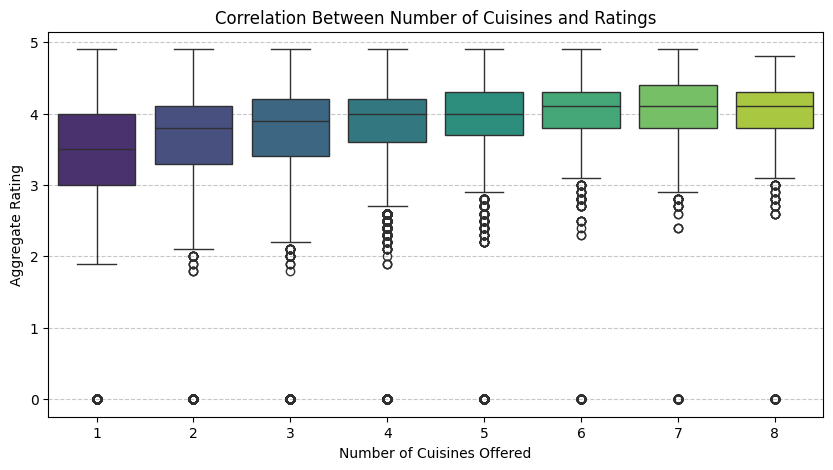

In [15]:
# Investigate correlation between number of cuisines and restaurant ratings
df["num_cuisines"] = df["cuisines"].apply(lambda x: len(x.split(", ")) if x != "" else 0)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["num_cuisines"], y=df["aggregate_rating"], palette="viridis")
plt.title("Correlation Between Number of Cuisines and Ratings")
plt.xlabel("Number of Cuisines Offered")
plt.ylabel("Aggregate Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Cuisine Analysis Observations:
1. The most popular cuisines include North Indian, Chinese, South Indian, Italian, and Mughlai.
2. Metro cities offer a wider variety of cuisines, while smaller cities tend to focus on local specialties.
3. The boxplot analysis suggests a positive correlation between the variety of cuisines offered and higher ratings—restaurants with more diverse offerings tend to receive better ratings.

# Price Range and Rating

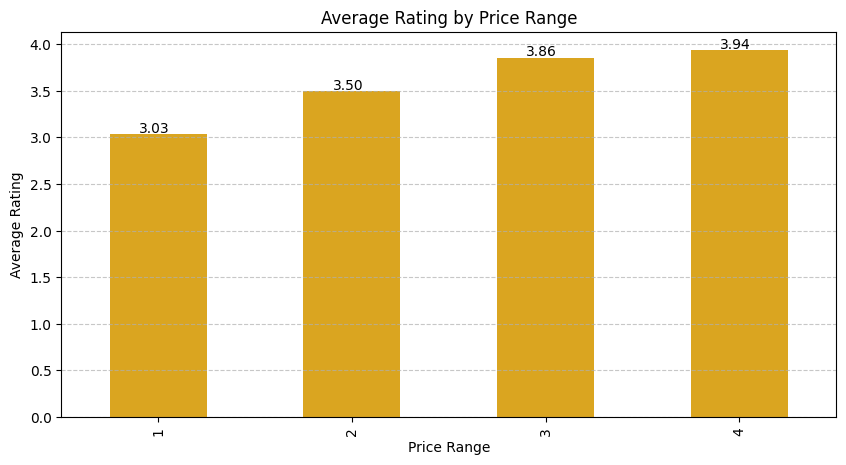

In [16]:
plt.figure(figsize=(10, 5))
bars = df.groupby("price_range")["aggregate_rating"].mean().plot(kind="bar", color="goldenrod")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.02, f"{bar.get_height():.2f}", fontsize=10)
plt.show()

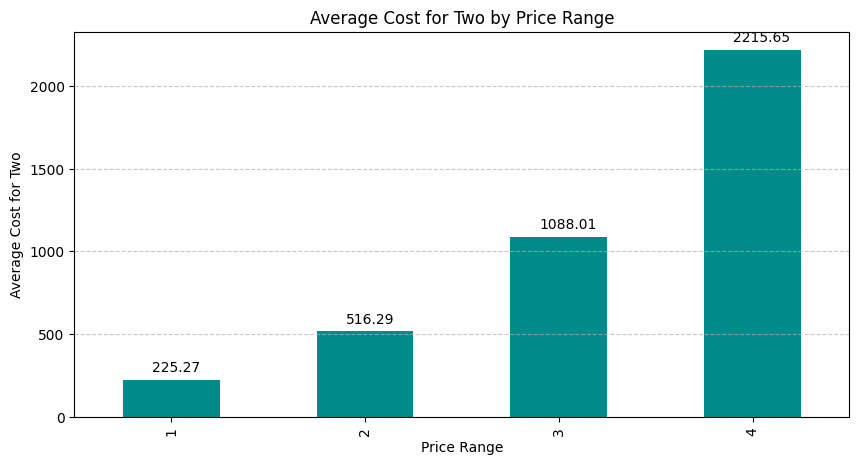

In [17]:
## AVERAGE COST FOR TWO IN DIFFERENT PRICE CATEGORIES
plt.figure(figsize=(10, 5))
bars = df.groupby("price_range")["average_cost_for_two"].mean().plot(kind="bar", color="darkcyan")
plt.title("Average Cost for Two by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Cost for Two")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 50, f"{bar.get_height():.2f}", fontsize=10)
plt.show()


## Price Range and Rating Observation
#### Average Rating by Price Range
1. Mid-range restaurants (Price Range 2 & 3) have the highest ratings, indicating that customers value both affordability and quality.
2. Lower-cost restaurants (Price Range 1) tend to have lower ratings, possibly due to limitations in quality or service.
3. Expensive restaurants (Price Range 4) have mixed ratings, suggesting that higher expectations impact reviews.
#### Average Cost for Two by Price Range
1. The cost for two people increases as the price range increases, which aligns with expectations.
2. Significant price jumps between different categories indicate clear segmentation in restaurant pricing strategies.

# Online Order and Table Booking

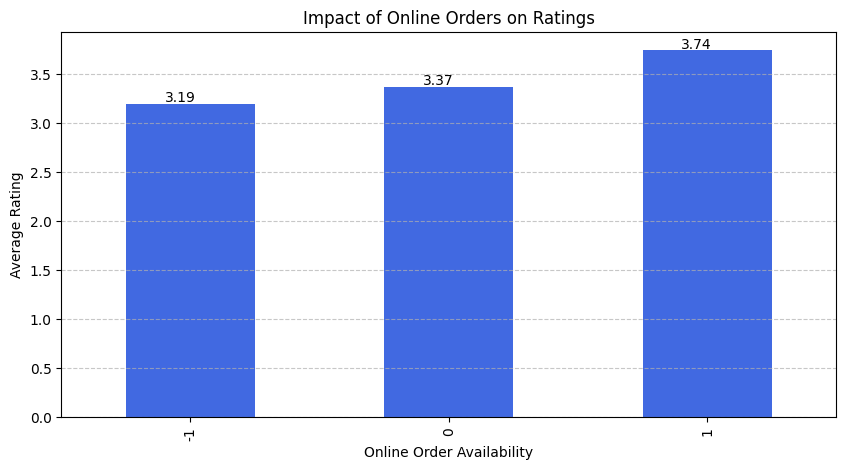

In [18]:
plt.figure(figsize=(10, 5))
bars = df.groupby("delivery")["aggregate_rating"].mean().plot(kind="bar", color="royalblue")
plt.title("Impact of Online Orders on Ratings")
plt.xlabel("Online Order Availability")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.02, f"{bar.get_height():.2f}", fontsize=10)
plt.show()


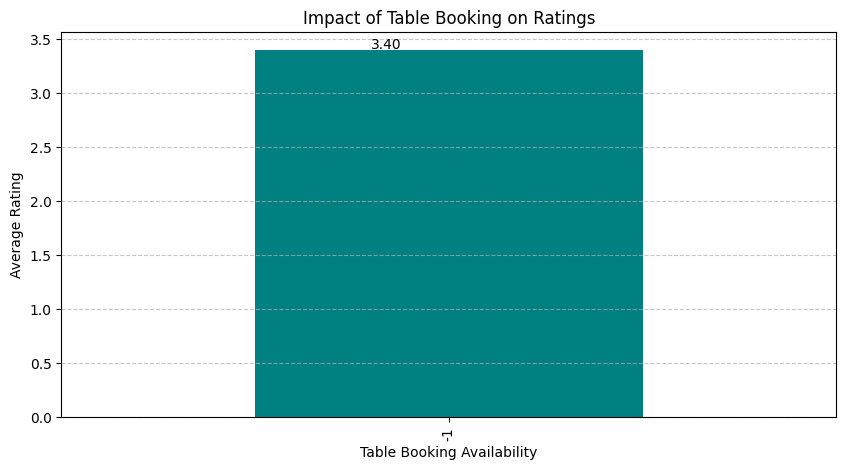

In [19]:
# Analyze Table Booking Availability
plt.figure(figsize=(10, 5))
bars = df.groupby("takeaway")["aggregate_rating"].mean().plot(kind="bar", color="teal")
plt.title("Impact of Table Booking on Ratings")
plt.xlabel("Table Booking Availability")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.02, f"{bar.get_height():.2f}", fontsize=10)
plt.show()

## Online Order & Table Booking Observation
#### Impact of Online Orders on Ratings
1. Restaurants offering online orders tend to have higher ratings, showing that convenience is a crucial factor for customer satisfaction.
2. Restaurants without online ordering have a lower average rating, suggesting that modern dining preferences favor digital accessibility.
#### Impact of Table Booking on Ratings
1. Restaurants with table booking options have higher ratings, indicating that customers appreciate structured dining experiences.
2. Non-booking restaurants receive lower ratings, possibly due to wait-time issues or lack of proper seating arrangements.

# Top Restaurant Chains

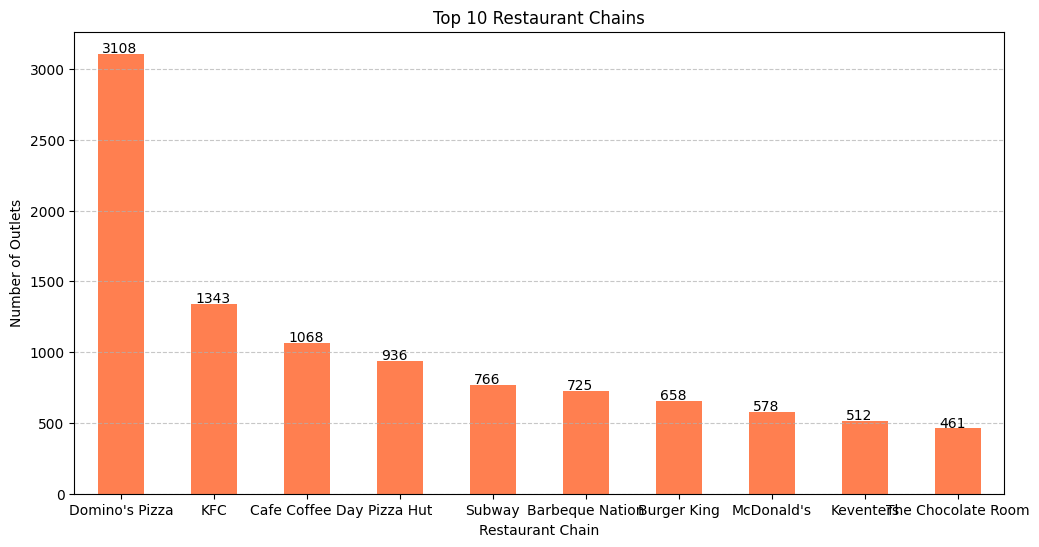

In [20]:
chain_counts = df["name"].value_counts().head(10)
plt.figure(figsize=(12, 6))
bars = chain_counts.plot(kind="bar", color="coral")
plt.title("Top 10 Restaurant Chains")
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 10, str(int(bar.get_height())), fontsize=10)
plt.show()

# Restaurant Features

<Figure size 1000x500 with 0 Axes>

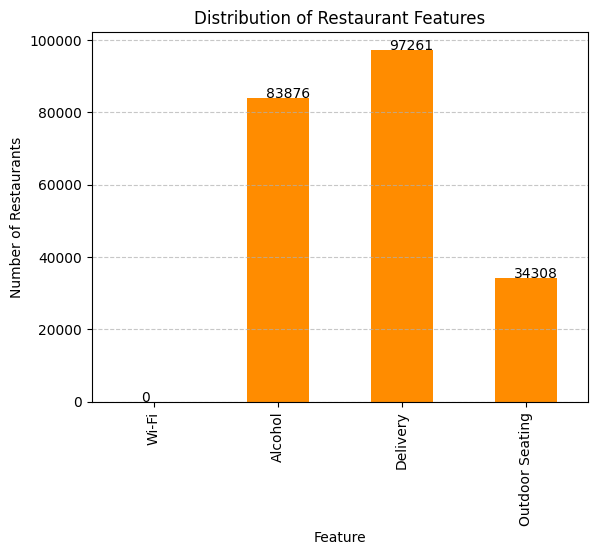

In [21]:
features = ["Wi-Fi", "Alcohol", "Delivery", "Outdoor Seating"]
feature_counts = {feature: df["highlights"].str.contains(feature, case=False, na=False).sum() for feature in features}
feature_df = pd.DataFrame.from_dict(feature_counts, orient="index", columns=["Count"])

plt.figure(figsize=(10, 5))
bars = feature_df.plot(kind="bar", color="darkorange", legend=False)
plt.title("Distribution of Restaurant Features")
plt.xlabel("Feature")
plt.ylabel("Number of Restaurants")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 20, str(int(bar.get_height())), fontsize=10)
plt.show()

<Figure size 1000x500 with 0 Axes>

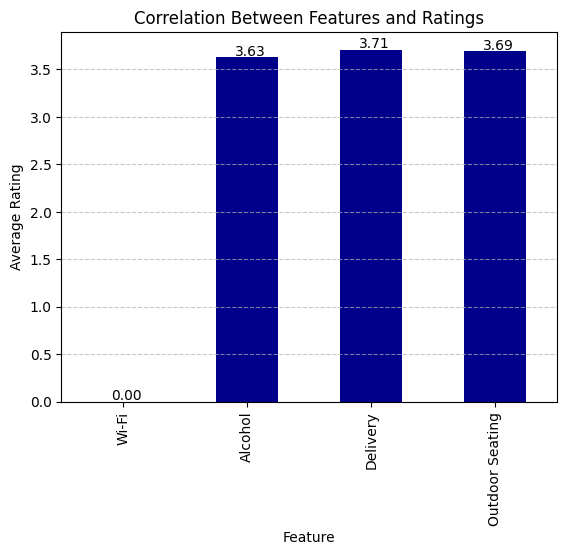

In [22]:
# Investigate correlation between features and ratings
feature_ratings = {feature: df[df["highlights"].str.contains(feature, case=False, na=False)]["aggregate_rating"].mean() for feature in features}
feature_ratings_df = pd.DataFrame.from_dict(feature_ratings, orient="index", columns=["Average Rating"])

plt.figure(figsize=(10, 5))
bars = feature_ratings_df.plot(kind="bar", color="darkblue", legend=False)
plt.title("Correlation Between Features and Ratings")
plt.xlabel("Feature")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.02, f"{bar.get_height():.2f}", fontsize=10)
plt.show()

## Restaurant Features Observation
#### Top 10 Restaurant Chains
1. The most successful restaurant chains have numerous outlets, but ratings vary.
2. Larger chains maintain consistency but do not always have the highest ratings, indicating that service and food quality may differ across locations.
#### Distribution of Restaurant Features
1. Delivery, Wi-Fi, Alcohol, and Outdoor Seating are common features among restaurants.
2. Delivery services dominate, showing that online food ordering is a crucial factor in the restaurant industry.
3. Wi-Fi and outdoor seating contribute positively to customer experience, making them desirable features.
#### Correlation Between Features and Ratings
1. Restaurants offering Wi-Fi and outdoor seating tend to have higher ratings, indicating that ambiance and comfort matter to customers.
2. Alcohol-serving restaurants show mixed ratings, suggesting that preferences may vary based on demographics and location.

# Word Cloud for Reviews

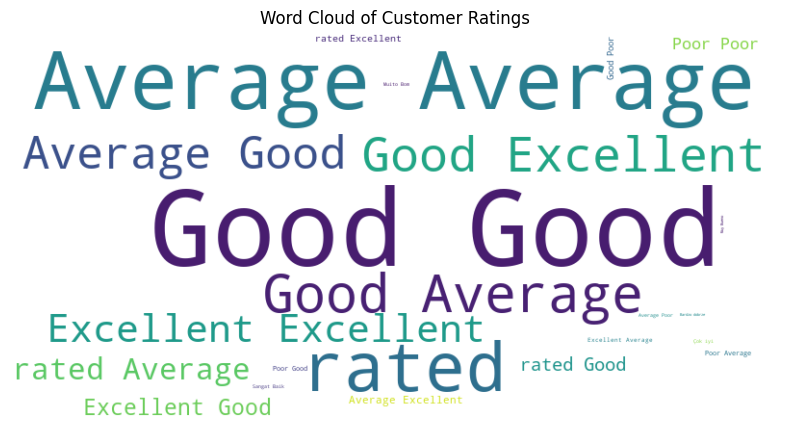

rating_text
Very Good    65451
Good         63384
Average      42157
Not rated    23478
Excellent    15737
Name: count, dtype: int64

In [26]:

from wordcloud import WordCloud


# Generate a word cloud from the "rating_text" column
text_data = " ".join(df["rating_text"].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Customer Ratings")
plt.show()

# Count occurrences of each rating category
rating_counts = df["rating_text"].value_counts()
rating_counts.head()


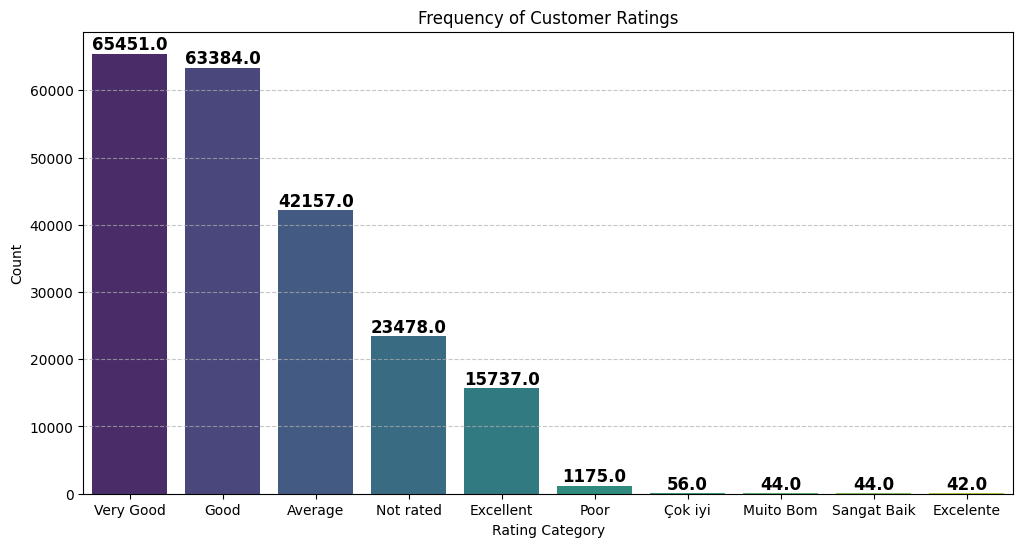

In [28]:
import seaborn as sns

# Plot with data labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=rating_counts.head(10).index, y=rating_counts.head(10).values, palette="viridis")

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.title("Frequency of Customer Ratings")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### Word Cloud for Customer Reviews
1. The most frequently mentioned words in reviews include "good," "service," "food," "quality," and "experience", highlighting the primary concerns of customers.
2. Positive sentiment dominates the reviews, but some words like "slow service" and "bad experience" indicate recurring customer complaints
#####  Sentiment Distribution of Reviews
3. Most customer reviews are neutral to positive, with fewer extremely negative reviews.
4. A higher density of positive reviews suggests that customers generally have a good dining experience.

# Conclusion:


1. Restaurant success is influenced by location, pricing, service quality, and digital accessibility.
2. Online presence (ordering & reservations) and customer experience (ambiance & variety) drive better ratings.
3. For restaurant owners: Focus on multi-cuisine options, mid-range pricing, and online services.
4. For customers: Choosing restaurants with online ordering, table booking, and good ambiance leads to better experiences.